In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
#Create training and test set

train=pd.read_csv('/content/train_set.csv')
test=pd.read_csv('/content/test_set.csv')
x_train=train.iloc[:,:-1]
y_train=train['NObeyesdad']
x_test=test.iloc[:,:-1]
y_test=test['NObeyesdad']

In [6]:
#Encoding all categorical variables into numerical representations

x_train['Gender']=x_train['Gender'].map({'Male':0,'Female':1})
x_train[['CALC','CAEC']]=x_train[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
le=LabelEncoder()
x_train['MTRANS']=le.fit_transform(x_train['MTRANS'])

x_test['Gender']=x_test['Gender'].map({'Male':0,'Female':1})
x_test[['CALC','CAEC']]=x_test[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
x_test[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_test[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
x_test['MTRANS']=le.fit_transform(x_test['MTRANS'])

/tmp/ipython-input-3196035748.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train[['CALC','CAEC']]=x_train[['CALC','CAEC']].replace({"no":0,"Sometimes":1,'Frequently':2,'Always':3})
/tmp/ipython-input-3196035748.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']]=x_train[['FAVC','SCC','SMOKE','family_history_with_overweight']].replace({"yes":1,'no':0})
/tmp/ipython-input-3196035748.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will

In [7]:
#Creating a Random Forest model and using KFold and GridSearch to find the best number of estimators and depth of tree.

rf=RandomForestClassifier(random_state=123)

#Number of estimators between 50 and 500, with a difference of 50 for each step. Depth is 5-10.
param={'n_estimators':range(50,610,50),'max_depth':range(2,6)}
grid=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
print("Best Model:",grid.best_estimator_,"\nScore:",grid.best_score_)

Best Model: RandomForestClassifier(max_depth=5, n_estimators=600, random_state=123) 
Score: 0.8755851315997403


The best model was found to be a maximum depth of 5 with 600 estimators. A limitation to this is that further depth of 10 or greater would yield higher accuracy, but this would sacrifice a readable plot, so accuracy was sacrificed for readability.

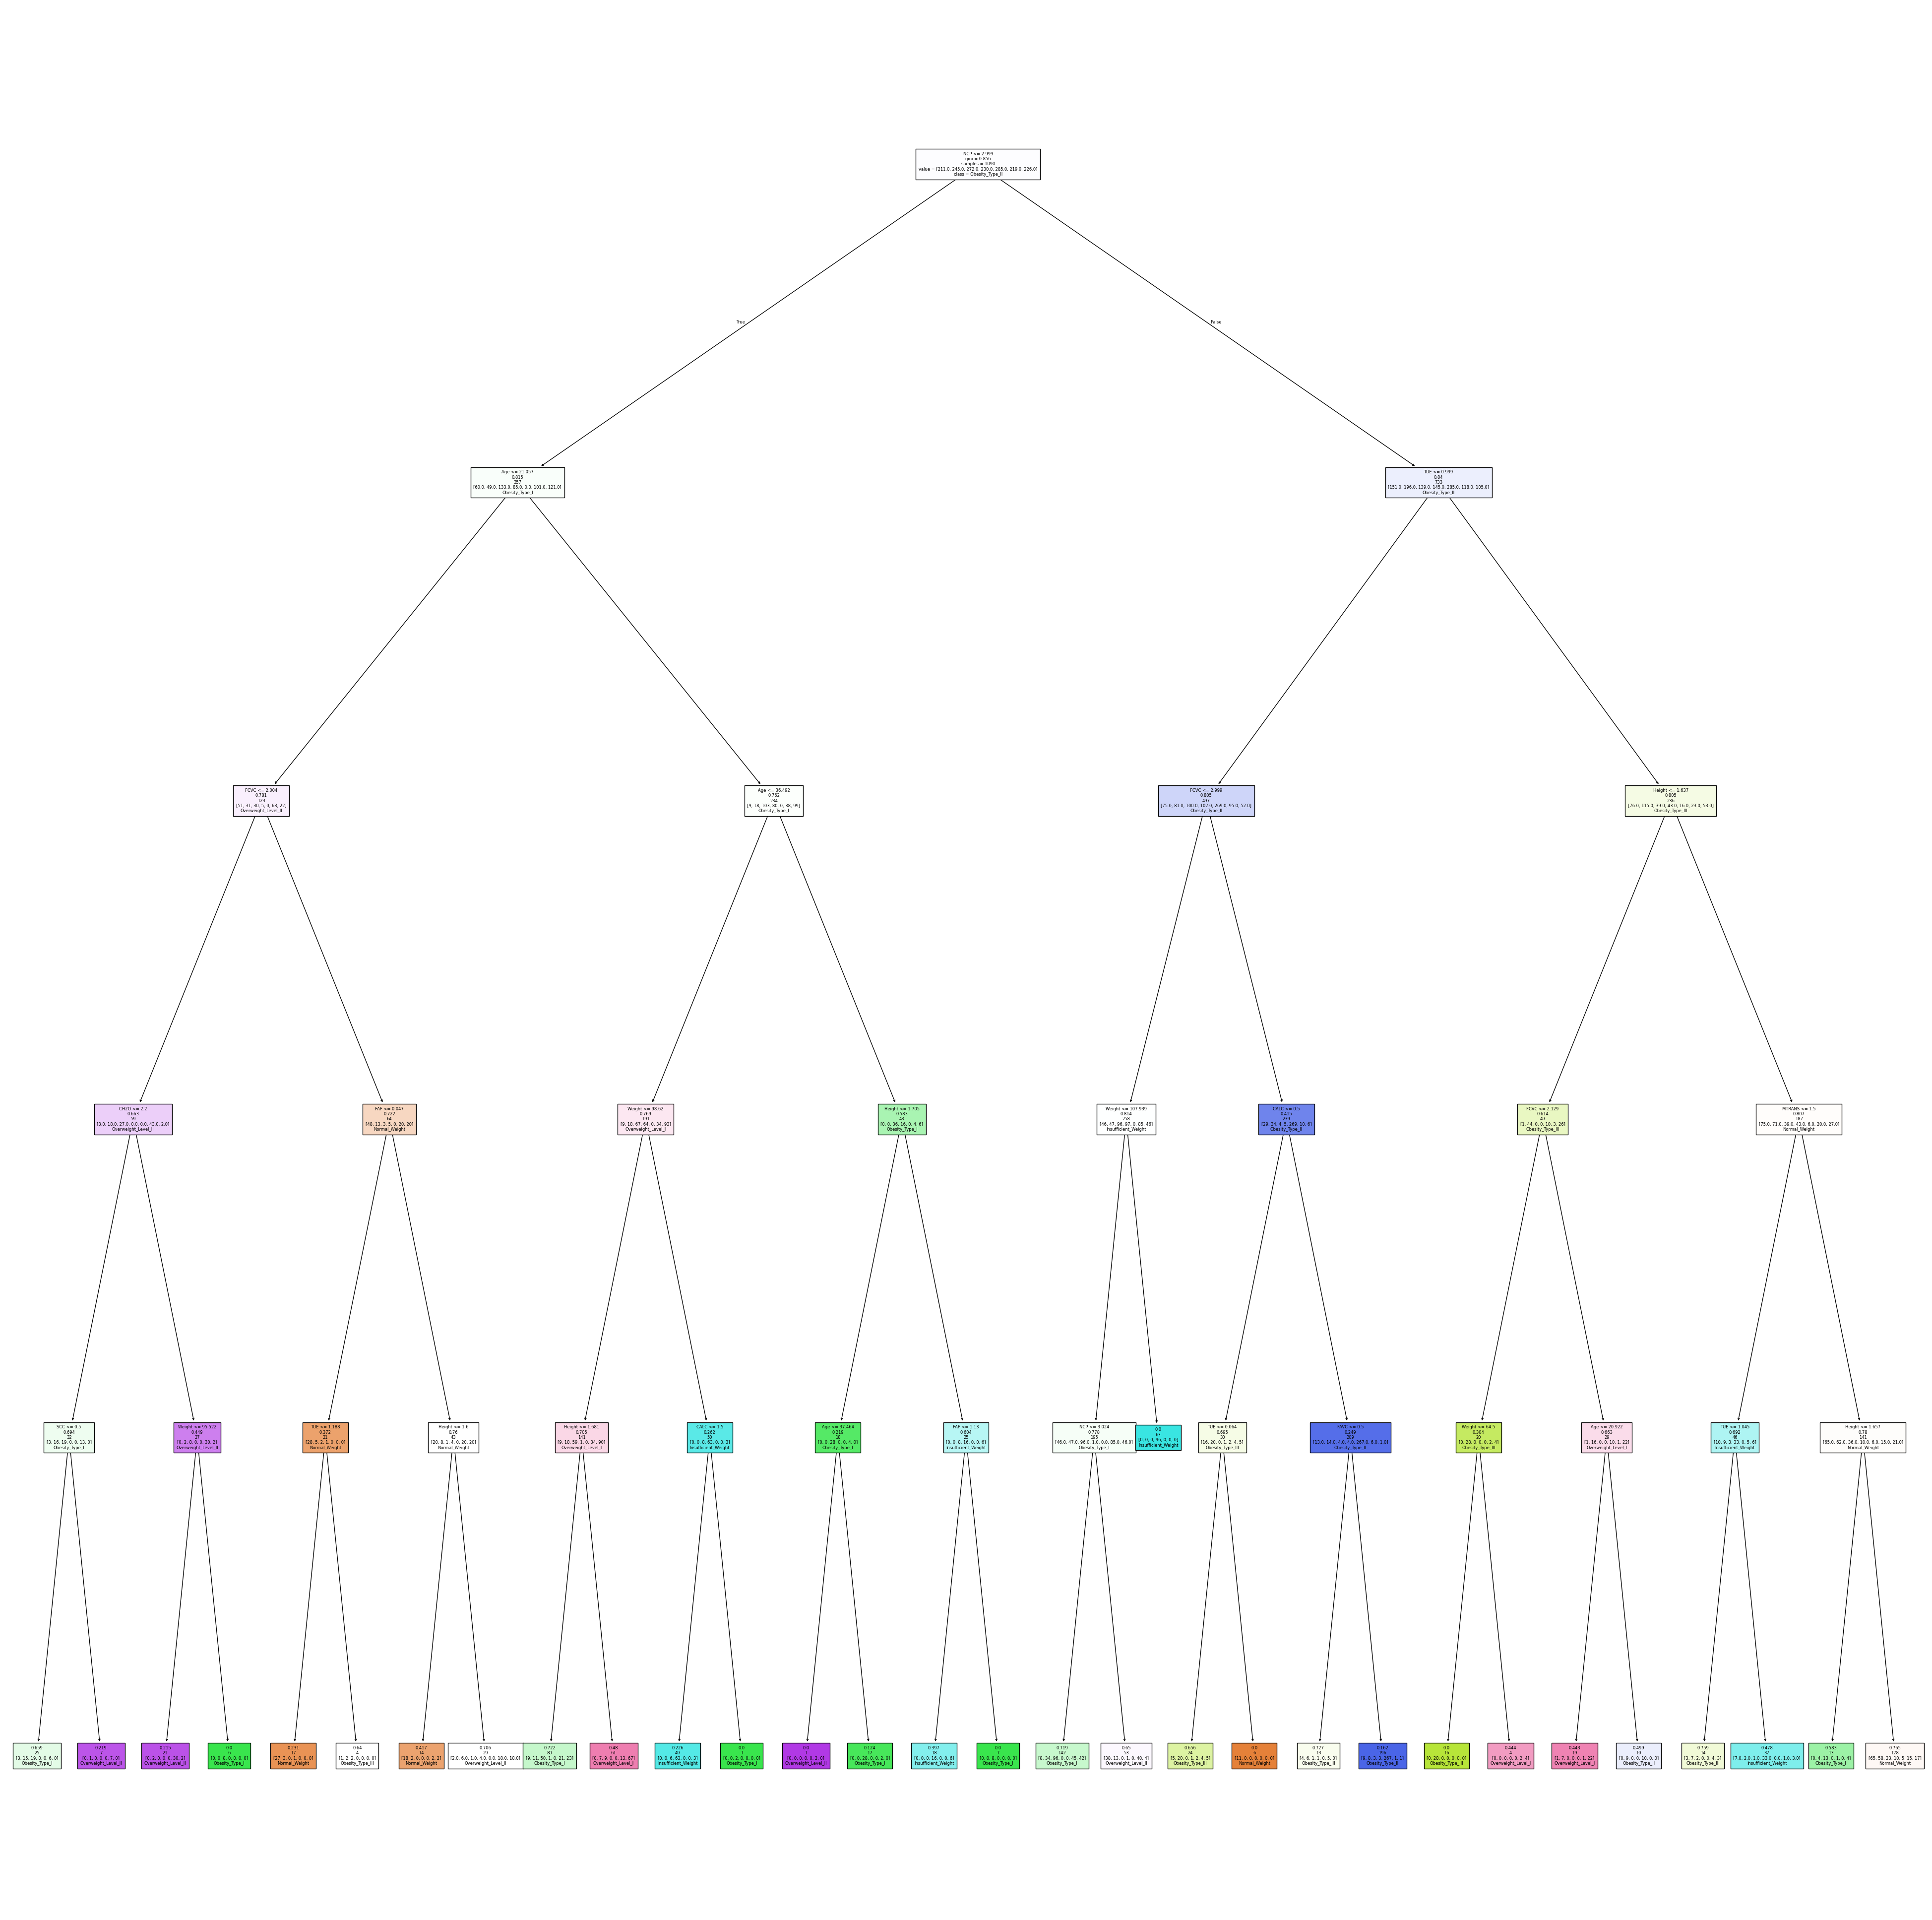

In [24]:
#Plotting the tree to see a physical representation

plt.figure(figsize=(50,50))
estimator=grid.best_estimator_.estimators_[0]
plot_tree(estimator,feature_names=x_train.columns.tolist(),class_names=y_train.unique().tolist(),filled=True,fontsize=6,label='root')
plt.savefig("Forest")
plt.show()

<Figure size 1000x1000 with 0 Axes>

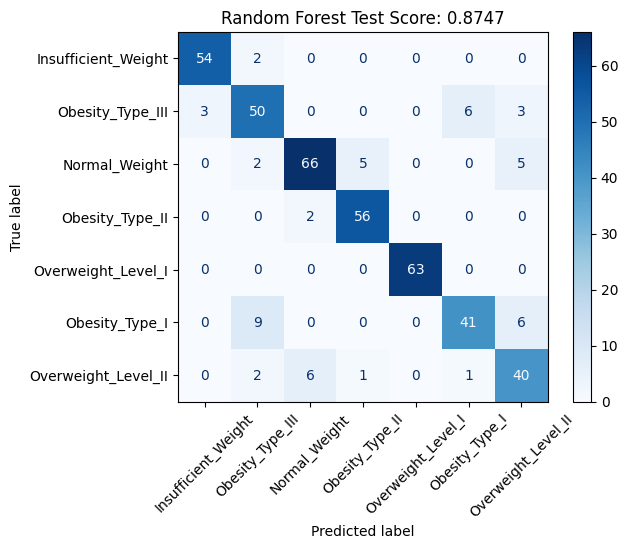

In [23]:
plt.figure(figsize=(10,10))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,grid.predict(x_test)),display_labels=y_test.unique())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title(f"Random Forest Test Score: {grid.score(x_test,y_test):.4f}")
plt.savefig("ForestConfusionMatrix")
plt.show()